References for this notebook
https://www.datacamp.com/tutorial/pandas-read-csv

Projected Birthrate workbook.
This workbook contains the week 1 excercise for Programming for Data Analytics: Projected Birthrate using data from the CSO website. 
Andrew has presented the data as a CSV file available on his Github account. 

Initially i had cloned this repositry to my owm machine location and was using that location to import the CSV file into the Jupyter notebook, but i quickly recognised there were a number of flaws with this stratagey:
1. This would mean the code would only run on my local machine - not usable from any other machine, including the person assessing the code for marking. 
2. Security risk: There is a security risk associated with sharing system informaton such as filepaths used on your machine, as this may be used by bad actors to learn about system vulnrabilities, that may increase your exposure to risk of an attack - especially as this code will be shared on a public Github account 



In [133]:
import os
import pandas as pd

# Define which columns to import from the CSV file
usecolsbirths = ["Year", "VALUE"]
usecolspopulation = ["Single Year of Age", "Administrative Counties", "VALUE"]
# note i have used the index_col function to force the Year column to be the first column 


# Method for Import the data directly from the raw github file location on the internet. 
# N.b. This code reads data from Andrew's github location, this data will be refreshed with any updates when the code is executed. (this 'pulls' the data from github every time the code is executed) 

projected_births_url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/projectedbirths-cso.csv'
population_by_age_url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/cso-populationbyage.csv'

df_projected_births = pd.read_csv('https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/projectedbirths-cso.csv', index_col = "Year", usecols = usecolsbirths)
df_population_by_age = pd.read_csv('https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/cso-populationbyage.csv', index_col = "Single Year of Age",  usecols = usecolspopulation)

# Filter out everything that is not the full country
df_filtered_population_by_age = df_population_by_age[(df_population_by_age['Administrative Counties'] =="Ireland")]


#need to clean up the age column to only display integer data
replace_values = {0: 'Under 1 year', 100 : '100 years and over'}
df_new_population_by_age = df_filtered_population_by_age.replace({"Single Year of Age": replace_values})

#df_new_population_by_age['Single Year of Age'].apply(lambda x: x.split(' ')[0])
#pd.set_option('display.max_rows', None)  # show all rows of dataframe

print(df_new_population_by_age)

                   Administrative Counties    VALUE
Single Year of Age                                 
All ages                           Ireland  5149139
Under 1 year                       Ireland    57796
1 year                             Ireland    56420
2 years                            Ireland    59210
3 years                            Ireland    60484
4 years                            Ireland    61505
5 years                            Ireland    64026
6 years                            Ireland    66714
7 years                            Ireland    69001
8 years                            Ireland    70733
9 years                            Ireland    72196
10 years                           Ireland    74101
11 years                           Ireland    75159
12 years                           Ireland    76254
13 years                           Ireland    75256
14 years                           Ireland    73432
15 years                           Ireland    70440
16 years    

Import MatplotLib and define a plot to display the data


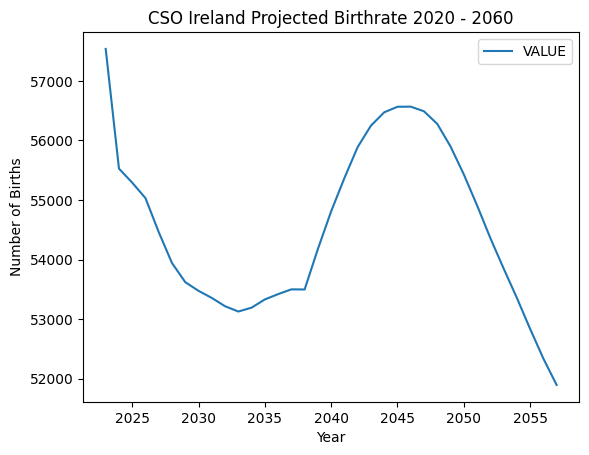

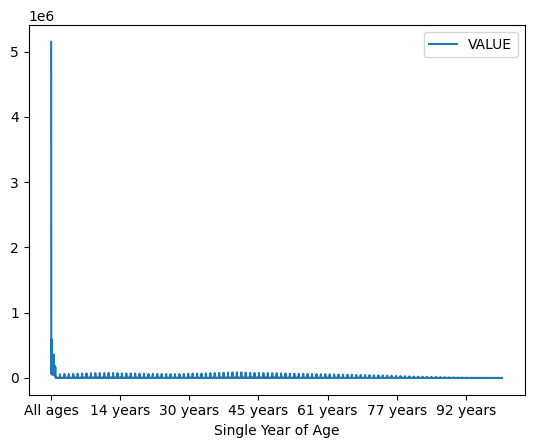

<Figure size 640x480 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt

df_projected_births.plot()
plt.title("CSO Ireland Projected Birthrate 2020 - 2060")
plt.ylabel("Number of Births")

df_population_by_age.plot()

# Adding text without box on the plot.
fig = plt.figure()
plt.show()